In [1]:
import numpy as np
import seaborn as sns
%matplotlib inline

## An introduction to Monte Carlo with weighted bootstrap sampling

[Monte Carlo methods](https://en.wikipedia.org/wiki/Monte_Carlo_method) are statistical techniques that use repeated random sampling to obtain numerical results.  

A potential benefit of using monte carlo methods to estimate uncertainty compared to 'medium', 'high' and 'low' estimates is the tighter uncertainty bounds given by monte carlo estimates because of reduced sampling of unlikely events.  This 'benefit' presumes that uncertainty bounds are fairly well understood which is often not the case as a result of a variety of unknowns.

For example, suppose we want to add or multiplying two parameters (x1, x2) that have are estimated to be normally distributed with mean of 4 and 5, and standard deviation of 1 and 2 respectively.  A convenient notation to describe these two normally distributed parameters is:
- x1: N~(4,1)
- x2: N~(5,2)

We can use monte carlo methods to estimate the product of x1 and x2 by sampling from their distributions:
y = N~(4,1) * N(5,2)

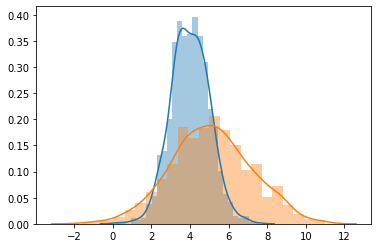

In [2]:
samples = 1000
x1 = np.random.normal(4,1, samples)
x2 = np.random.normal(5,2,samples)
sns.distplot(x1)
sns.distplot(x2)

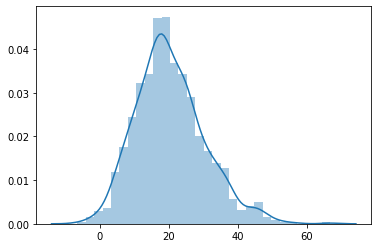

In [3]:
y = x1 * x2
sns.distplot(y)

In addition to sampling measured parameters from distributions, sometimes we may have a need to reconcile parameter estimates from different sources in our monte carlo assessment.  With a large sample size, sample statistics (mean, standard deviation) can be estimated from using each of the individual estimates.  With smaller sample sizes, bootstrap sampling with replacement is a technique that can be used to estimate the underlying distribution from a set of point estimates.  

For example, say we have five estimates of x1 instead of an estimate for x1 of N~(4,1):
- x1_1 =3
- x1_2 =4.5
- x1_3 = 7
- x1_4 = 3.5
- x1_5 = 5

In this example each of these estimates is a point value with no descriptive statistics to indicate uncertainty.  Bootstrap sampling with replacement works by sampling a number of values (e.g. 3) from the set of x1_1 to x1_5 using replacement (each time a value is sampled from the set it is not removed and so can be resampled again on the next draw) and taking the average of the sampled values.  Bootstraping undertakes this sampling procedure repeatedly to build a distribution to represent the entire sample

Now let's implement a method for bootstrap sampling and apply it to this set of estimates for x1.

In [4]:
def bootstrap_weighted(array, n_samples, length, p=None):
    """
    Weighted bootstrap sampling with replacement.
    
    length : int
        Length of return value.
    p : ndarray
        Probability for each value in array.
    array : ndarray
        Array to sample from.
    n_samples : int
        Number of samples with replacement
        
        
    """
    if p == None:
        print("No p array given so assuming equal weighting")
        p = np.array(len(array)*[1/len(array)])
    if not np.equal(sum(p),1):
        print("p should sum to 1, but sum is {}".format(sum(p)))
    response = np.zeros(length)
    for i in range(length):
        weighted_samples = np.random.choice(array, size=n_samples, replace=True, p=p)
        response[i] = np.mean(weighted_samples)
    return response

### actual estimates of x1

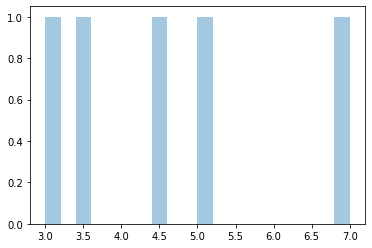

In [5]:
x1 = [3,4.5,7,3.5,5]
sns.distplot(x1, bins=20, kde=False);

### estimated distribution of x1 using bootstrap sampling

No p array given so assuming equal weighting


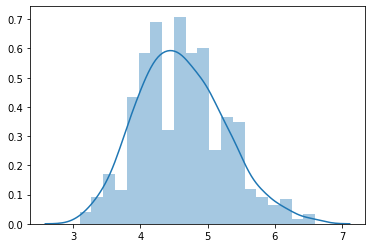

In [6]:
x1_bootstrap = bootstrap_weighted([3,4.5,7,3.5,5], n_samples=5, length=1000)
sns.distplot(x1_bootstrap)

### updated estimate of y using x1_bootstrap

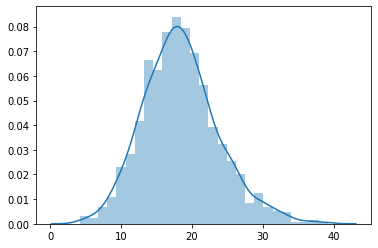

In [7]:
samples = 1000
y = np.random.normal(4,1, samples)*x1_bootstrap
sns.distplot(y)

In [8]:
print("sample statistics from raw data")
print("mean: {}".format(np.mean(x1)))
print("std: {}".format(np.std(x1)))
print("-----------")
print("sample statistics from bootstrap sampling with replacement")
print("mean: {}".format(np.mean(x1_bootstrap)))
print("std: {}".format(np.std(x1_bootstrap)))

sample statistics from raw data
mean: 4.6
std: 1.3928388277184118
-----------
sample statistics from bootstrap sampling with replacement
mean: 4.6099
std: 0.6401499746153241


The weighted bootsrap method we have defined above also given us the opportunity to apply a weighting factor to each of the individual estimates.  This can be useful if there is some evidence to suggest that certain parameter estimates are more likely or valid than others (e.g. measurement procedures follow standard practices).  We can use this information to influence the likelihood that specific estimates will be sampled.

sample statistics from bootstrap sampling with replacement
mean: 5.573
std: 0.7108804400178695


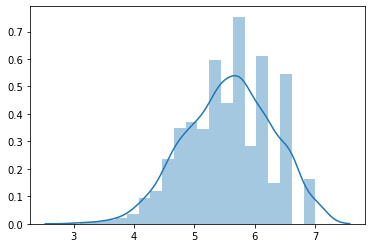

In [9]:
x1_bootstrap = bootstrap_weighted([3,4.5,7,3.5,5], n_samples=5, length=1000, p=[0.1,0.1,0.5,0.1,0.2])
print("sample statistics from bootstrap sampling with replacement")
print("mean: {}".format(np.mean(x1_bootstrap)))
print("std: {}".format(np.std(x1_bootstrap)))
sns.distplot(x1_bootstrap)

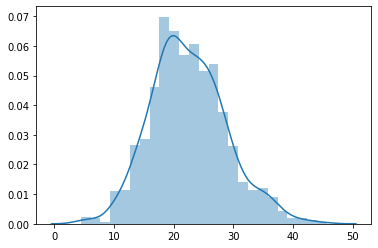

In [10]:
samples = 1000
y = np.random.normal(4,1, samples)*x1_bootstrap
sns.distplot(y)